In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 16978 × 14663
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets',

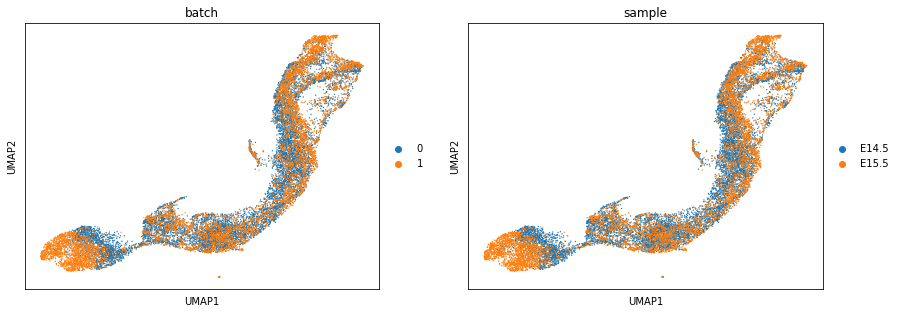

In [4]:
sc.pl.umap(adata, color=["batch", "sample"]) # as in previous notebook we see `batch` and `sample` are bijective

In [5]:
adata.obsm["X_umap_paga"] = adata.obsm["X_umap"].copy()

In [14]:
sc.tl.umap(adata)
adata.obsm["X_umap"] = adata.obsm["umap"].copy()

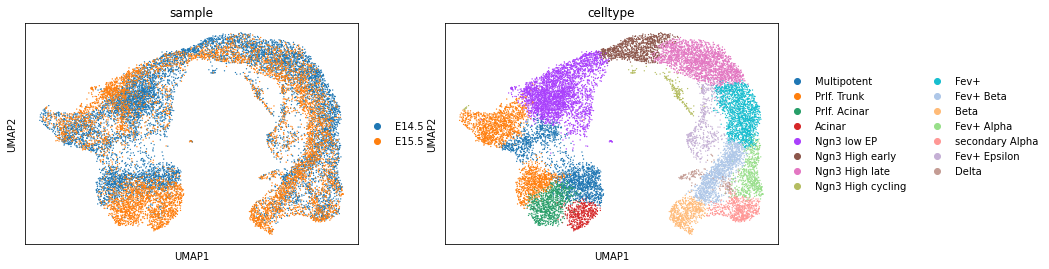

In [16]:
sc.pl.umap(adata, color=["sample", "celltype"])

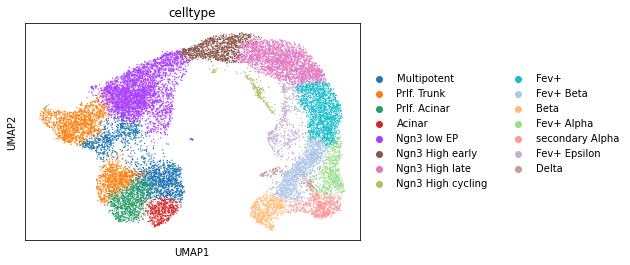

In [17]:
sc.pl.embedding(adata, basis="umap", color=["celltype"])

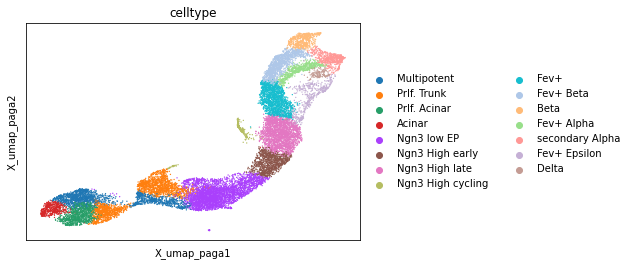

In [18]:
sc.pl.embedding(adata, basis="X_umap_paga", color=["celltype"])

In [19]:
adata.write("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_GEX_with_umap.h5ad")

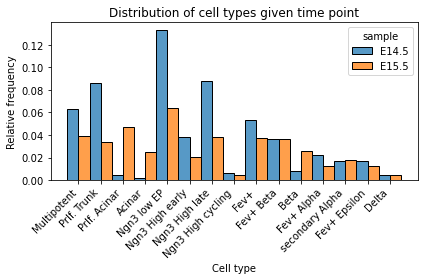

In [20]:
# In order for OT to work we need to see a shift in distribution

sns.histplot(data=adata.obs, x="celltype", hue="sample", multiple='dodge', stat = 'probability')
plt.xlabel("Cell type")
plt.ylabel("Relative frequency")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of cell types given time point")
plt.tight_layout()

#### Differentiably expressed genes

In [ ]:
sc.tl.rank_genes_groups(adata, "celltype", method="t-test_overestim_var")

## ATAC

In [22]:
bdata = sc.read_h5ad("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_ATAC_annotated.h5ad")


In [23]:
bdata

AnnData object with n_obs × n_vars = 16978 × 261915
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'sample', 'ident', 'old_index', 'celltype'
    var: 'count', 'percentile'
    uns: 'X_name'
    obsm: 'LSI', 'UMAP.ATAC'
    layers: 'logcounts'

In [35]:
bdata.obsm["umap_ATAC"] = bdata.obsm["UMAP.ATAC"][["atacUMAP_1", "atacUMAP_2"]].values

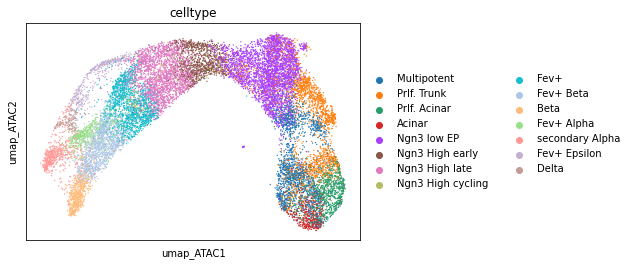

In [37]:
sc.pl.embedding(bdata, basis="umap_ATAC", color="celltype")

In [27]:
sc.pp.neighbors(bdata)
sc.tl.umap(bdata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


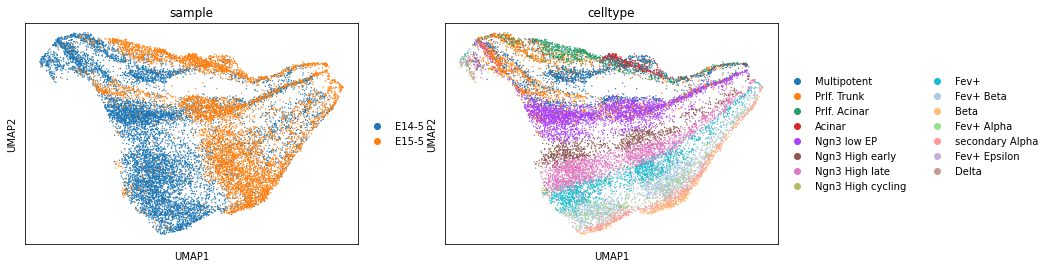

In [29]:
sc.pl.umap(bdata, color=["sample", "celltype"])

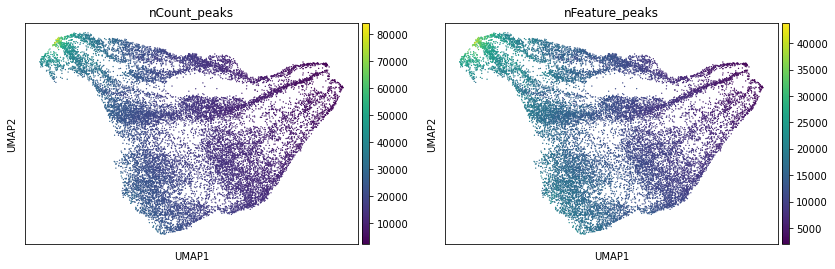

In [30]:
sc.pl.umap(bdata, color=['nCount_peaks', 'nFeature_peaks'])

In [ ]:
from muon import atac as ac
ac.tl.rank_peaks_groups(bdata, "celltype", method="t-test_overestim_var")

In [ ]:
bdata.write("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_ATAC_annotated_with_umap.h5ad")